In [2]:

def create_agent():
    return {
        'id': 0,
        'alpha': 0.0,
        'goods': 0.0,
        'eta': 0.0,
        'money': 0.0,
        'utility': 0.0,
        'num_intra_connections': 0,
        'intra_connections': 0,
        'num_inter_connections': 0,
        'inter_connections':0,
        'Util_func': 0
    }



## define encounter matrix

In [3]:
import numpy as np

# Create a 1000x1000 matrix filled with 1s
matrix1 = np.ones((10, 10))

# Set the diagonal elements to 0
np.fill_diagonal(matrix1, 0)

matrix2 = np.ones((20, 20))

# Set the diagonal elements to 0
np.fill_diagonal(matrix1, 0)

matrix3 = np.ones((10, 10))

# Set the diagonal elements to 0
np.fill_diagonal(matrix3, 0)


In [4]:
def encounter_generator(matrix):
  k_list=[]
  sum_k=0
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      current_k=matrix[i][j]
      sum_k+=current_k
      k_list.append(sum_k)

  total = k_list[-1]
  normalized_k_list = [n/total for n in k_list]



  return normalized_k_list




In [5]:
import random
# Creating the lists
id_list = [i for i in range(100)]
alpha = [2]*10

eta = [2.5]*10
#goods = [random.randint(10, 90) for _ in range(100)]
#money = [random.randint(100, 900) for _ in range(100)]
goods = [0.25 for _ in range(10)]
money = [0.085 for _ in range(10)]
inter_connections=matrix1
intra_connections=0

In [6]:
agent_a = create_agent()
agent_a['id_list'] = id_list
agent_a['alpha']=alpha
agent_a['eta']=eta
agent_a['money']=money
agent_a['goods']=goods
agent_a['intra_connections']=intra_connections
agent_a['inter_connections']=inter_connections


In [7]:
agent_a['money']

[0.085, 0.085, 0.085, 0.085, 0.085, 0.085, 0.085, 0.085, 0.085, 0.085]

In [8]:
def utility_func(m1,m2,g1,g2,alpha1,alpha2,eta1,eta2):
  a=m1**(eta1-1)
  b=m2**(eta2-1)
  c=g1**(alpha1-1)
  d=g2**(alpha2-1)
  utility=a*b*c*d

  utility=float(utility)
  return utility

## define agent b

In [9]:
import random
# Creating the lists
id_list = [i for i in range(100)]
alpha = [2]*100

eta = [1.5]*100
#goods = [random.randint(10, 90) for _ in range(100)]
#money = [random.randint(100, 900) for _ in range(100)]
goods = [1.375 for _ in range(20)]
money = [0.0075 for _ in range(20)]
inter_connections=matrix2
intra_connections=0

In [10]:
agent_b = create_agent()
agent_b['id_list'] = id_list
agent_b['alpha']=alpha
agent_b['eta']=eta
agent_b['money']=money
agent_b['goods']=goods
agent_b['intra_connections']=intra_connections
agent_b['inter_connections']=inter_connections

## trade

In [11]:


def random_pick(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=round(G*a)
    new_g = random.randint(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0.5:
        new_g = 1 + (1 - new_g)
    elif new_g > G-0.5:
        new_g = 2*(G-1) - new_g

    return new_g




In [12]:
def random_pick2(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=G*a
    new_g = random.uniform(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0:
        new_g =  - new_g
    elif new_g > G:
        new_g = 2*(G) - new_g

    return new_g

In [13]:
import random
import math

def trade(good1,good2,money1,money2,alpha1,alpha2,eta1,eta2):


    i=0
    M=money1+money2
    G=good1+good2

    while i <100:


        # Generate a random reallocation
        new_good  = random_pick2(good1,G,0.3)
        new_money = random_pick2(money1,M,0.3)

        # Calculating new utility
        #good_utility1 = utility_func(1,1,good1,good2, alpha, 0)
        #good_utility2 = utility_func(1,1,(new_good), (G-new_good), alpha, 0)

        # Calculate the change in utility
        money_utility1 = utility_func(money1,money2,good1,good2, alpha1,alpha2, eta1,eta2)

        money_utility2 =utility_func(new_money,(M-new_money),new_good,(G-new_good), alpha1,alpha2, eta1,eta2)


        if money_utility2 > money_utility1:
            # Accept the reallocation


            money1 = new_money

            money2 = M-new_money
            good1=new_good
            good2=G-new_good



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


              money1 = new_money

              money2 = M-new_money
              good1=new_good
              good2=G-new_good



        i=i+1




    return money1,money2,good1,good2






## rest

In [14]:


import numpy as np

def encounter(matrix,k_list):
    number= random.random()
    i=0
    n=len(matrix[0])
    while k_list[i]<number:
      i+=1
    row=i//n
    col=i%n



    return row, col






In [15]:
import random

def encounter1(matrix):
    # Pick a random row
    row = random.choice(range(len(matrix)))

    # Pick a random column different from the row
    possible_cols = [i for i in range(len(matrix[0])) if i != row]
    col = random.choice(possible_cols)

    return row, col





In [16]:
mk=[50 for _ in range(100)]

In [17]:
def full_trade(agent,mk):
  matrix=agent['inter_connections']
  money=[50 for _ in range(100)]
  goods=agent['goods']
  eta=agent['eta']
  alpha=agent['alpha']
  num_agent=100
  for i in range(10000):
    a1,a2=encounter1(matrix)

    money1=money[a1]
    money2=money[a2]
    alpha1=alpha[a1]
    alpha2=alpha[a2]

    m1n,m2n=trade(1,1,money1,money2,alpha1,alpha2,0,0)
    money[a1]=m1n
    money[a2]=m2n

  return money








## normal trade

In [18]:
def full_trade2(agent, mk):
    matrix = agent['inter_connections']
    money21 = [50 for _ in range(100)] # Use a copy of mk to avoid modifying the original list
    alpha = agent['alpha']

    # This will store the state of the money list after each iteration
    money_history = []


    for i in range(1000):
        a1, a2 = encounter1(matrix)

        money1 = money21[a1]
        money2 = money21[a2]
        alpha1 = alpha[a1]
        alpha2 = alpha[a2]

        m1n, m2n= trade(1, 1, money1, money2, alpha1, alpha2, 0, 0)
        money21[a1] = m1n
        money21[a2] = m2n

        # Append a copy of the current state of money to the history
        money_history.append(money21.copy())

    return money_history


In [19]:
matrix2= np.ones((20, 20))

## inter trade

In [20]:
def agent_inter_trade(mlist1,mlist2,glist1,glist2,matrix_i,alpha_1,alpha_2,eta_1,eta_2):
  a1,a2=encounter1(matrix_i)
  money1=mlist1[a1]
  money2=mlist2[a2]
  good1=glist1[a1]
  good2=glist2[a2]

  m1n,m2n,g1n,g2n=trade(good1,good2,money1,money2,alpha_1,alpha_2,eta_1,eta_2)
  mlist1[a1]=m1n
  mlist2[a2]=m2n
  glist1[a1]=g1n
  glist2[a2]=g2n
  return mlist1,mlist2,glist1,glist2

In [21]:
def agent_intra_trade(mlist,glist,matrix_i,alpha_1,eta_1):
  a1,a2=encounter1(matrix_i)
  money1=mlist[a1]
  money2=mlist[a2]
  good1=glist[a1]
  good2=glist[a2]
  m1n,m2n,g1n,g2n=trade(good1,good2,money1,money2,alpha_1,alpha_1,eta_1,eta_1)
  mlist[a1]=m1n
  mlist[a2]=m2n
  glist[a1]=g1n
  glist[a2]=g2n
  return mlist, glist

In [22]:
len(matrix1)

10

In [23]:
def inter_trade(agent1,agent2):

  moneya=agent1['money'].copy()
  moneyb=agent2['money'].copy()
  gooda=agent1['goods'].copy()
  goodb=agent2['goods'].copy()
  money_historya=[]
  money_historyb=[]
  good_historya=[]
  good_historyb=[]


  alphaa=agent1['alpha'].copy()
  alphab=agent2['alpha'].copy()
  num_agent=100
  money_historya.append(sum(moneya))

  money_historyb.append(sum(moneyb))
  good_historya.append(sum(gooda))

  good_historyb.append(sum(goodb))
  for i in range(10000):
    print(i)
    # trade in economy a
    new_moneya,new_gooda=agent_intra_trade(moneya,gooda,matrix1,1,2.5)
    moneya=new_moneya.copy()
    gooda=new_gooda.copy()
    # trade in economy b
    new_moneyb,new_goodb=agent_intra_trade(moneyb,goodb,matrix2,1,1.5)
    moneyb=new_moneyb.copy()
    goodb=new_goodb.copy()
    # inter trade
    new_ma,new_mb,new_ga,new_gb=agent_inter_trade(moneya,moneyb,gooda,goodb,matrix3,1,1,2.5,1.5)
    moneya=new_ma.copy()
    moneyb=new_mb.copy()
    gooda=new_ga.copy()
    goodb=new_gb.copy()



    money_historya.append(sum(moneya))

    money_historyb.append(sum(moneyb))
    good_historya.append(sum(gooda))

    good_historyb.append(sum(goodb))









  return money_historya,money_historyb,good_historya,good_historyb

In [24]:
import random

def calculate_averages(lst, chunk_size):
    averages = []
    for i in range(0, len(lst)):
        if i < chunk_size:
            chunk = lst[0:i+1]  # Average the first 0 to i items
        else:
            chunk = lst[i - chunk_size + 1:i+1]  # Average i-chunk_size to i items

        averages.append(sum(chunk) / len(chunk))

    return averages

## plot

In [25]:
import matplotlib.pyplot as plt

m1,m2,g1,g2=inter_trade(agent_a,agent_b)


# Replace m1 and g1 with your actual data
tg = calculate_averages(g1,1000)
tm=calculate_averages(m1,1000)

流式输出内容被截断，只能显示最后 5000 行内容。
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
519

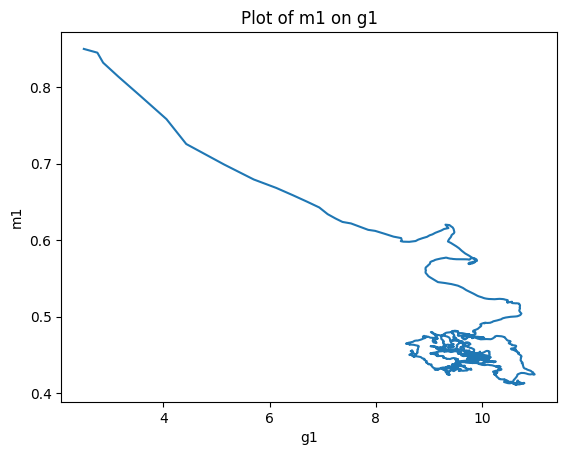

In [26]:
import matplotlib.pyplot as plt

# Replace m1 and g1 with your actual data
time_averagesa = calculate_averages(g1,10000)
time_averagesb=calculate_averages(m1,10000)

# Create a plot
plt.plot(tg, tm)

# Label the axes
plt.xlabel('g1')
plt.ylabel('m1')

# Add a title to the plot
plt.title('Plot of m1 on g1')

# Display the plot
plt.show()


In [27]:
import matplotlib.pyplot as plt

# Initialize lists to store the results
tm_values = []
tg_values = []

# Replace m1 and g1 with your actual data
for i in range(1, 6):  # Iterate 5 times
    m1, m2, g1, g2 = inter_trade(agent_a, agent_b)


    # Calculate time averages for m1 and g1
    tm = calculate_averages(m1, 10000)
    tg = calculate_averages(g1, 10000)

    # Append the results to the lists
    tm_values.append(tm)
    tg_values.append(tg)



# Now, tm_values and tg_values contain tm1, tg1, tm2, tg2, tm3, tg3, tm4, tg4, tm5, tg5
tm1, tg1, tm2, tg2, tm3, tg3, tm4, tg4, tm5, tg5 = tm_values[0], tg_values[0], tm_values[1], tg_values[1], tm_values[2], tg_values[2], tm_values[3], tg_values[3], tm_values[4], tg_values[4]


流式输出内容被截断，只能显示最后 5000 行内容。
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
519

In [ ]:
g1[1]

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a colormap using 'YlOrBu' (Yellow-Orange-Blue) colormap
cmap = plt.get_cmap('YlOrBr', 9)  # You can adjust the number of colors as needed

# Extract the RGB values from the colormap
warm_colors = [cmap(i) for i in reversed(range(9))]

# Create a custom colormap with modified colors
custom_cmap = ListedColormap(warm_colors)


14.470054628171251

<ipython-input-29-c5810484a52e>:15: RuntimeWarning: divide by zero encountered in log
  equation_values[i, j] = 10 * np.log(g1 * m1**2.5) + 20 * np.log((30 - g1) * (1 - m1)**1.5)


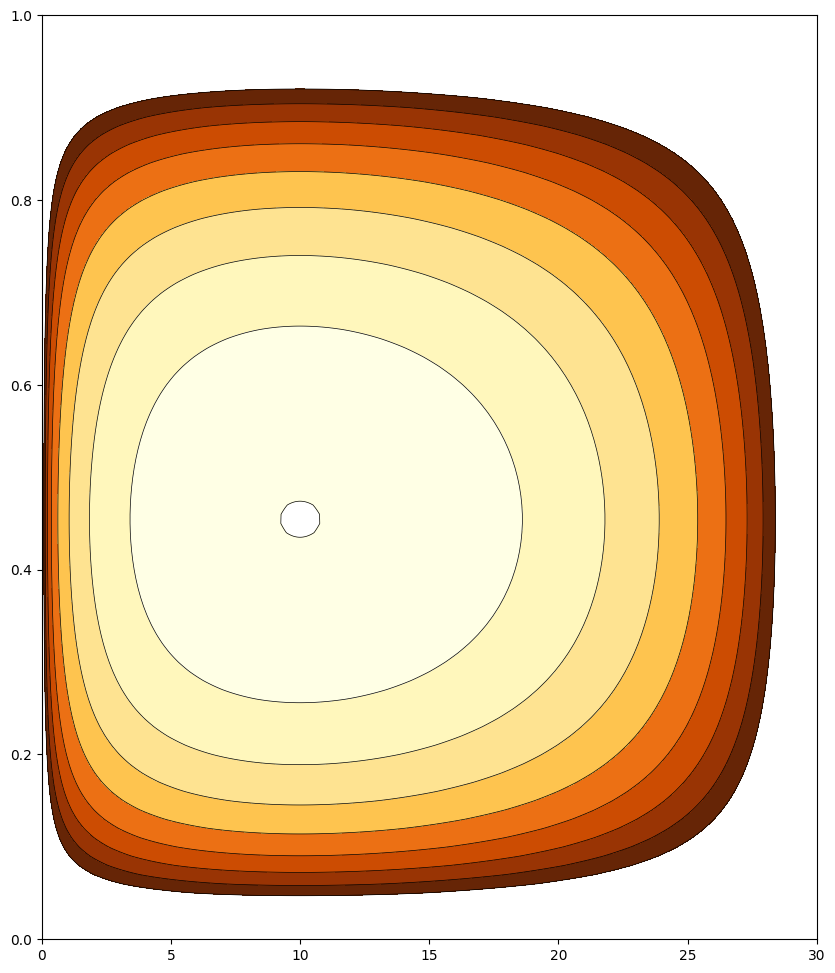

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the range of m1 and g1 values
m1_values = np.arange(0, 1.01, 0.01)  # Range from 0 to 1 with step size 0.01
g1_values = np.arange(0, 30.01, 0.01)  # Range from 0 to 30 with step size 0.01

# Create empty arrays to store the equation values
equation_values = np.empty((len(m1_values), len(g1_values)))

# Calculate the equation values for all combinations of m1 and g1
for i, m1 in enumerate(m1_values):
    for j, g1 in enumerate(g1_values):
        equation_values[i, j] = 10 * np.log(g1 * m1**2.5) + 20 * np.log((30 - g1) * (1 - m1)**1.5)

# Define the threshold values for the condition
thresholds = [5, 10, 15, 20, 25, 30, 35, 40, 45]

# Create a custom colormap with different colors using a specified Python colormap


# Create a contour plot with the custom colormap
plt.figure(figsize=(10, 12))
contour = plt.contourf(g1_values, m1_values, equation_values, levels=thresholds, cmap=custom_cmap)
contour_lines = plt.contour(g1_values, m1_values, equation_values, levels=thresholds, linewidths=0.5, colors='black')








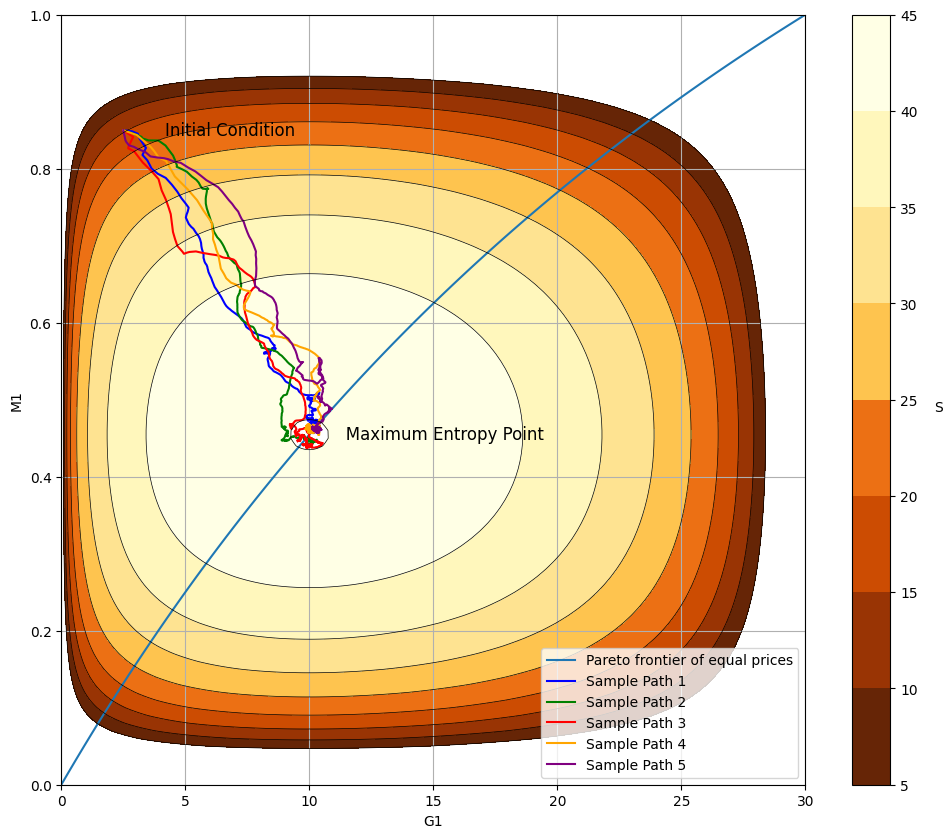

In [37]:
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Create a figure and axis
plt.figure(figsize=(12, 10))
plt.xlabel('G1')
plt.ylabel('M1')
import matplotlib.pyplot as plt

# Other plot settings and data

# Add labels for 'Initial Condition' and 'Max Entropy Point' at specific coordinates
plt.text(2.5, 0.85, '        Initial Condition', fontsize=12, color='black', ha='left', va='center')
plt.text(10.0, 0.455, '       Maximum Entropy Point', fontsize=12, color='black', ha='left', va='center')
# 定义 G 的范围
Gp = np.linspace(0, 30, 100)

# 计算对应的 M 值
Mp = 5 * Gp / (90 + 2 * Gp)
# Other plot settings and show the plot
plt.plot(Gp, Mp, label='Pareto frontier of equal prices')

# Plot the five curves with different colors and add labels for the legend
for i in range(5):
    plt.plot(tg_values[i], tm_values[i], color=colors[i], label=f'Sample Path {i+1}')

# Add a legend to the plot
plt.legend()

contour = plt.contourf(g1_values, m1_values, equation_values, levels=thresholds, cmap=custom_cmap)
contour_lines = plt.contour(g1_values, m1_values, equation_values, levels=thresholds, linewidths=0.5, colors='black')

# Add a colorbar with labeled thresholds
cbar = plt.colorbar(contour)

cbar.set_ticks(thresholds)
cbar.set_ticklabels([str(val) for val in thresholds])
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('S', rotation=360)
# Show the plot
plt.grid()
plt.show()

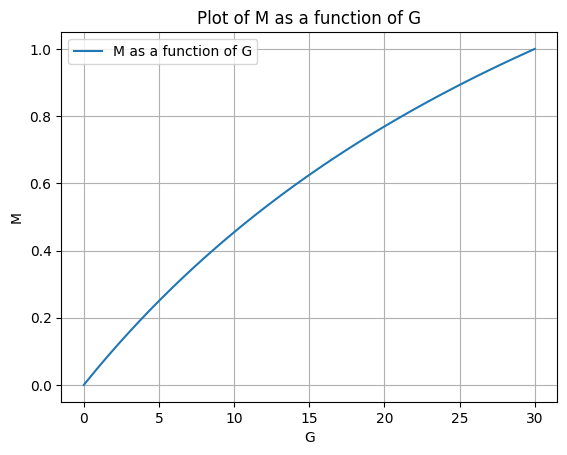

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 G 的范围
Gp = np.linspace(0, 30, 100)

# 计算对应的 M 值
Mp = 5 * G / (90 + 2 * G)

# 绘制结果
plt.plot(G, M, label='Pareto frontier of equal prices')


plt.grid(True)
plt.legend()
plt.show()




In [39]:
1- 20/26

0.23076923076923073

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of m1 and g1 values
m1_values = np.arange(0, 1.001, 0.001)  # Range from 0 to 1 with step size 0.01
g1_values = np.arange(0, 30.001, 0.001)  # Range from 0 to 30 with step size 0.01

# Create empty arrays to store the equation values
equation_values = np.empty((len(m1_values), len(g1_values)))

# Calculate the equation values for all combinations of m1 and g1
for i, m1 in enumerate(m1_values):
    for j, g1 in enumerate(g1_values):
        equation_values[i, j] = np.log(10 * g1 * m1**2.5) + np.log(20 * (30 - g1) * (1 - m1)**1.5)

# Define the threshold value for the condition
threshold = 10

# Create a contour plot with a single contour line
plt.figure(figsize=(10, 6))
contour = plt.contour(g1_values, m1_values, equation_values, levels=[threshold], colors='blue')

# Set axis labels and a title
plt.xlabel('g1')
plt.ylabel('m1')
plt.title(f'Curve of the Condition (={threshold}) for (g1, m1) Sets')

# Show the plot
plt.grid()
plt.show()



<ipython-input-73-3ecb364b3fb3>:14: RuntimeWarning: divide by zero encountered in log
  equation_values[i, j] = np.log(10 * g1 * m1**2.5) + np.log(20 * (30 - g1) * (1 - m1)**1.5)


KeyboardInterrupt: 

In [ ]:
k = np.log(10 * 15 * 0.5**2.5) + np.log(20 * (30 - 10) * (1 - 0.5)**1.5)
k

8.229511118964457

In [ ]:
import numpy as np

# Define the range of m1 and g1 values
m1_values = np.linspace(0, 1, 1001)  # Range from 0 to 1 with 0.001 step size
g1_values = np.linspace(0, 30, 3001)  # Range from 0 to 30 with 0.01 step size

# Initialize variables to store the maximum value and corresponding m1 and g1 values
max_value = -float('inf')
max_m1 = None
max_g1 = None

# Iterate through the values and find the maximum
for m1 in m1_values:
    for g1 in g1_values:
        value = 10*np.log( g1 * m1**2.5) + 20*np.log( (30 - g1) * (1 - m1)**1.5)
        if value > max_value:
            max_value = value
            max_m1 = m1
            max_g1 = g1

print(f"The highest value is {max_value} for m1 = {max_m1} and g1 = {max_g1}")


<ipython-input-47-506153254373>:15: RuntimeWarning: divide by zero encountered in log
  value = 10*np.log( g1 * m1**2.5) + 20*np.log( (30 - g1) * (1 - m1)**1.5)


The highest value is 45.044965370673815 for m1 = 0.455 and g1 = 10.0


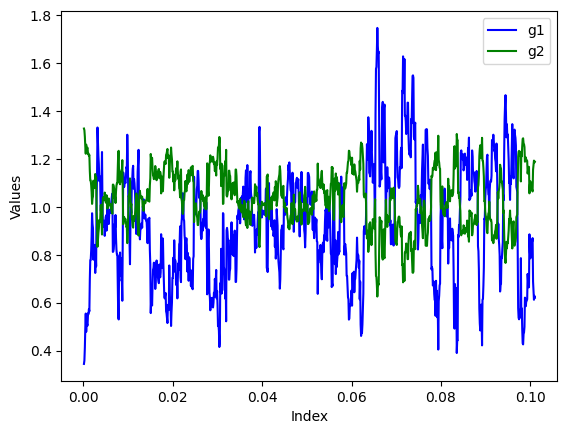

In [ ]:
import matplotlib.pyplot as plt



# Create a range of indices for the x-axis
numbers = list(range(1, 1001))
result = [num / 9900 for num in numbers]

# Plot both lists on the same graph
plt.plot(result, g1, label='g1', color='blue')
plt.plot(result, g2, label='g2', color='green')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
np.mean(b)

18022.99633

In [ ]:
agent_a['money']=[100 for _ in range(100)]
agent_b['money']=[200 for _ in range(100)]

In [ ]:
def inter_trade2(agent1, agent2):
  matrix=agent1['inter_connections']
  moneya=agent1['money'].copy()
  moneyb=agent2['money'].copy()

  alphaa=agent1['alpha'].copy()
  alphab=agent2['alpha'].copy()
  num_agent=100
  money_historya=[]
  money_historyb=[]
  for j in range(60000):
    new_moneya=agent_intra_trade(moneya,matrix,alphaa)
    moneya=new_moneya.copy()
    # trade in economy b
    new_moneyb=agent_intra_trade(moneyb,matrix,alphab)
    moneyb=new_moneyb.copy()
    average_a=sum(moneya)/200
    average_b=sum(moneyb)/300
    #money_historya.append(average_a)
    #money_historyb.append(average_b)


  for i in range(100000):
    # trade in economy a
    new_moneya=agent_intra_trade(moneya,matrix,alphaa)
    moneya=new_moneya.copy()
    # trade in economy b
    new_moneyb=agent_intra_trade(moneyb,matrix,alphab)
    moneyb=new_moneyb.copy()
    # inter trade
    new_a,new_b=agent_inter_trade(moneya,moneyb,matrix2,alphaa,alphab)
    moneya=new_a.copy()
    moneyb=new_b.copy()

    # Append a copy of the current state of money to the history
    average_a=sum(moneya)/200
    average_b=sum(moneyb)/300
    money_historya.append(average_a)

    money_historyb.append(average_b)

  return money_historya,money_historyb


In [ ]:
a,b=inter_trade2(agent_a,agent_b)

## graph

In [ ]:
ta[1]

25.0

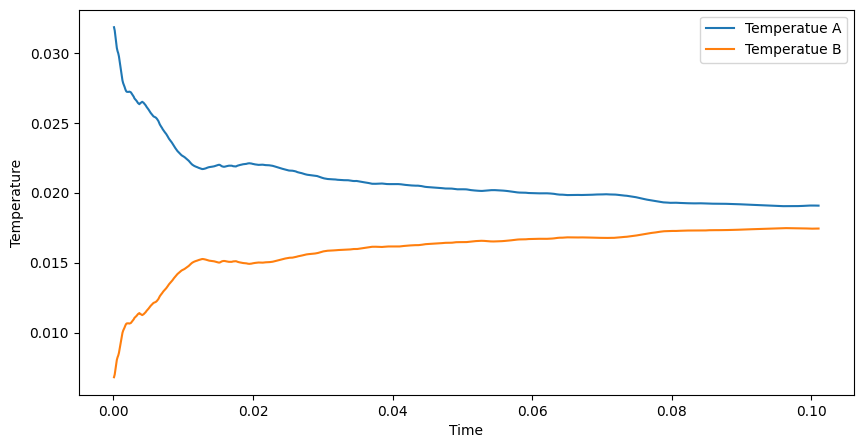

In [ ]:
time_averagesa = calculate_averages(m1,10000)
time_averagesb=calculate_averages(m2,10000)



numbers = list(range(1, 1001))
result = [num / 9900 for num in numbers]
sub_result=result
sub_ta=time_averagesa
sub_tb=time_averagesb
import matplotlib.pyplot as plt

# Now, let's plot 'ta' and 'tb' against 'result'
plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plot 'ta' and 'tb' using 'result' as the x-axis
plt.plot(sub_result, sub_ta, label='Temperatue A')
plt.plot(sub_result, sub_tb, label='Temperatue B')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')


# Add a legend to distinguish the lines
plt.legend()

# Finally, show the plot
plt.show()


In [ ]:
len(a)

1000000

In [ ]:
import matplotlib.pyplot as plt

# Now, let's plot 'ta' and 'tb' against 'result'
plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plot 'ta' and 'tb' using 'result' as the x-axis
plt.plot(sub_result, sub_ta, label='Temperatue A')
plt.plot(sub_result, sub_tb, label='Temperatue B')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Plot of Temperatue against Time')

# Add a legend to distinguish the lines
plt.legend()

# Finally, show the plot
plt.show()



NameError: ignored

<Figure size 1000x500 with 0 Axes>

## others

In [ ]:

# Use a list comprehension to divide each element by 500
ma= [item *2/ 300 for item in ta]
mb= [item *3/ 300 for item in tb]



In [ ]:
np.mean(mb)

0.5995075249333335

In [ ]:
mca=ma[100000:]
np.var(mb)

0.00046464802102648916

In [ ]:
6/(25*501)

0.00047904191616766467

In [ ]:
import numpy as np
from scipy.stats import beta

# Set the shape parameters for the beta distribution
alpha_param = 200
beta_param = 300

# Sample 1000 points from the beta distribution
samples = beta.rvs(alpha_param, beta_param, size=100000)

# Calculate the variance of the samples
variance = np.var(samples)

print(f"The variance of the 1000 samples from the beta distribution is: {variance}")


The variance of the 1000 samples from the beta distribution is: 0.00047727416375730115


100000

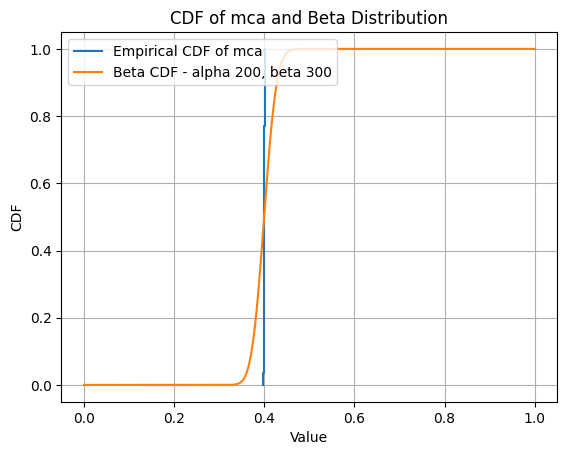

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, cumfreq

# Assuming mca is a list of values between 0 and 1

# Calculate the CDF of the beta distribution
alpha_param = 200
beta_param = 300
x = np.linspace(0, 1, 1000)
beta_cdf = beta.cdf(x, alpha_param, beta_param)

# Calculate the empirical CDF for mca
a = np.array(mca)
num_bins = 100
counts, bin_edges = np.histogram(a, bins=num_bins, density=True)
cdf = np.cumsum(counts) / np.sum(counts)
bin_edges = bin_edges[1:]

# Plot the empirical CDF of mca
plt.step(bin_edges, cdf, label='Empirical CDF of mca', where='post')

# Plot the CDF of the beta distribution
plt.plot(x, beta_cdf, label=f'Beta CDF - alpha {alpha_param}, beta {beta_param}')

# Adding labels and legend
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of mca and Beta Distribution')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


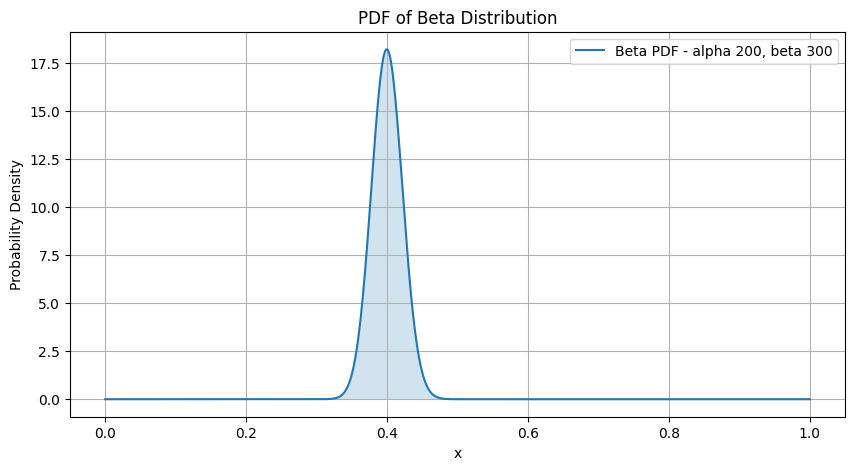

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np

# Parameters for the beta distribution
alpha_param = 200
beta_param = 300

# Define the range of the x-axis
x = np.linspace(0, 1, 1000)

# Calculate the PDF of the beta distribution
pdf = beta.pdf(x, alpha_param, beta_param)

# Plot the PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label=f'Beta PDF - alpha {alpha_param}, beta {beta_param}')
plt.fill_between(x, pdf, alpha=0.2)

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF of Beta Distribution')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
np.var(ma[60000:])
np.var(mb[5000:])

2.9082776760961345e-06

In [ ]:
(500)/((500**2)*501)

3.992015968063873e-06

## get inter trade

In [ ]:
m1,m2=inter_trade(agent_a,agent_b)

In [ ]:
kl=full_trade(agent_a,mk)
kl

## get KM


In [ ]:
km=[]
for i in range(100):
  k6=full_trade(agent_a,mk)
  km.extend(k6)

In [ ]:
list2k=full_trade2(agent_a,mk)

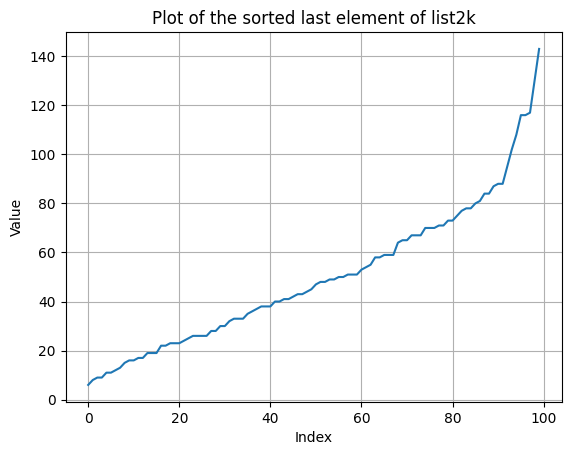

In [ ]:
import matplotlib.pyplot as plt

# Assuming list2k is already defined
data = sorted(list2k[-1])

# Plotting the sorted data
plt.plot(data)
plt.title("Plot of the sorted last element of list2k")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


## by time

In [ ]:
list_2ka = [item[:50] for item in list2k]
list_2kb = [item[50:] for item in list2k]


In [ ]:
len(list_2kb)

1000000

In [ ]:
import numpy as np

mean_variances = []

# Loop over the positions 0 through 19
for i in range(50):
    # Extract the ith element from each item in list_2kb[700:]
    elements = [item[i] for item in list_2kb[800000:]]

    # Calculate the variance of these elements
    variance = np.var(elements)

    # Append the variance to our list of variances
    mean_variances.append(variance)

# Calculate the mean of these variances
average_variance = np.mean(mean_variances)

print(average_variance)




1186.5610701473277


In [ ]:
last_1000 = list2k[800000:]

In [ ]:
len(list2k)

1000000

In [ ]:
len(list2k)

In [ ]:
import numpy as np

# Assuming last_1000 is defined elsewhere in your code

# Calculate average variance for positions 0-49
variances_0_49 = [np.var([sublist[i] for sublist in last_1000]) for i in range(50)]
average_variance_0_49 = np.mean(variances_0_49)

# Calculate average variance for positions 50-99
variances_50_99 = [np.var([sublist[i] for sublist in last_1000]) for i in range(50, 100)]
average_variance_50_99 = np.mean(variances_50_99)

print("Average Variance for indices 0-49:", average_variance_0_49)
print("Average Variance for indices 50-99:", average_variance_50_99)


KeyboardInterrupt: ignored

In [ ]:
import csv

# Assuming list_2k is defined elsewhere in your code

with open('list_2k.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(list2k)


In [ ]:
len(list2k)

1000000

In [ ]:

# Extract the last 1000 items from list2k
last_1000 = list2k[800000:]

# Function to compute variance based on 3 random pairs of indices

def compute_variance(item_list):
    values = []
    coke=agent_a['alpha']
    indices = np.random.choice(100, size=3, replace=False)  # 6 values, since we want 3 pairs
    total = sum(coke[i] for i in indices)

    for item in item_list:

        # Sum the values at these indices
        value_sum = sum(item[i] for i in indices)
        values.append(value_sum)
    return np.var(values),total


In [ ]:
a=[]
b=[]
c=[]
d=[]
for _ in range(400):
    va, vt = compute_variance(last_1000)  # Assuming last_1000 is defined somewhere or can be different each iteration
    if vt == 6:
        a.append(va)
    elif vt == 7:
        b.append(va)
    elif vt == 8:
        c.append(va)
    elif vt == 9:
        d.append(va)

# Calculate means of each list
mean_a = sum(a) / len(a) if a else 0
mean_b = sum(b) / len(b) if b else 0
mean_c = sum(c) / len(c) if c else 0
mean_d = sum(d) / len(d) if d else 0

print("Mean of list a:", mean_a)
print("Mean of list b:", mean_b)
print("Mean of list c:", mean_c)
print("Mean of list d:", mean_d)




Mean of list a: 2284.4683013991107
Mean of list b: 2692.3308346458584
Mean of list c: 3071.586678536145
Mean of list d: 3491.831952344207


In [ ]:
len(d)

48

## time average


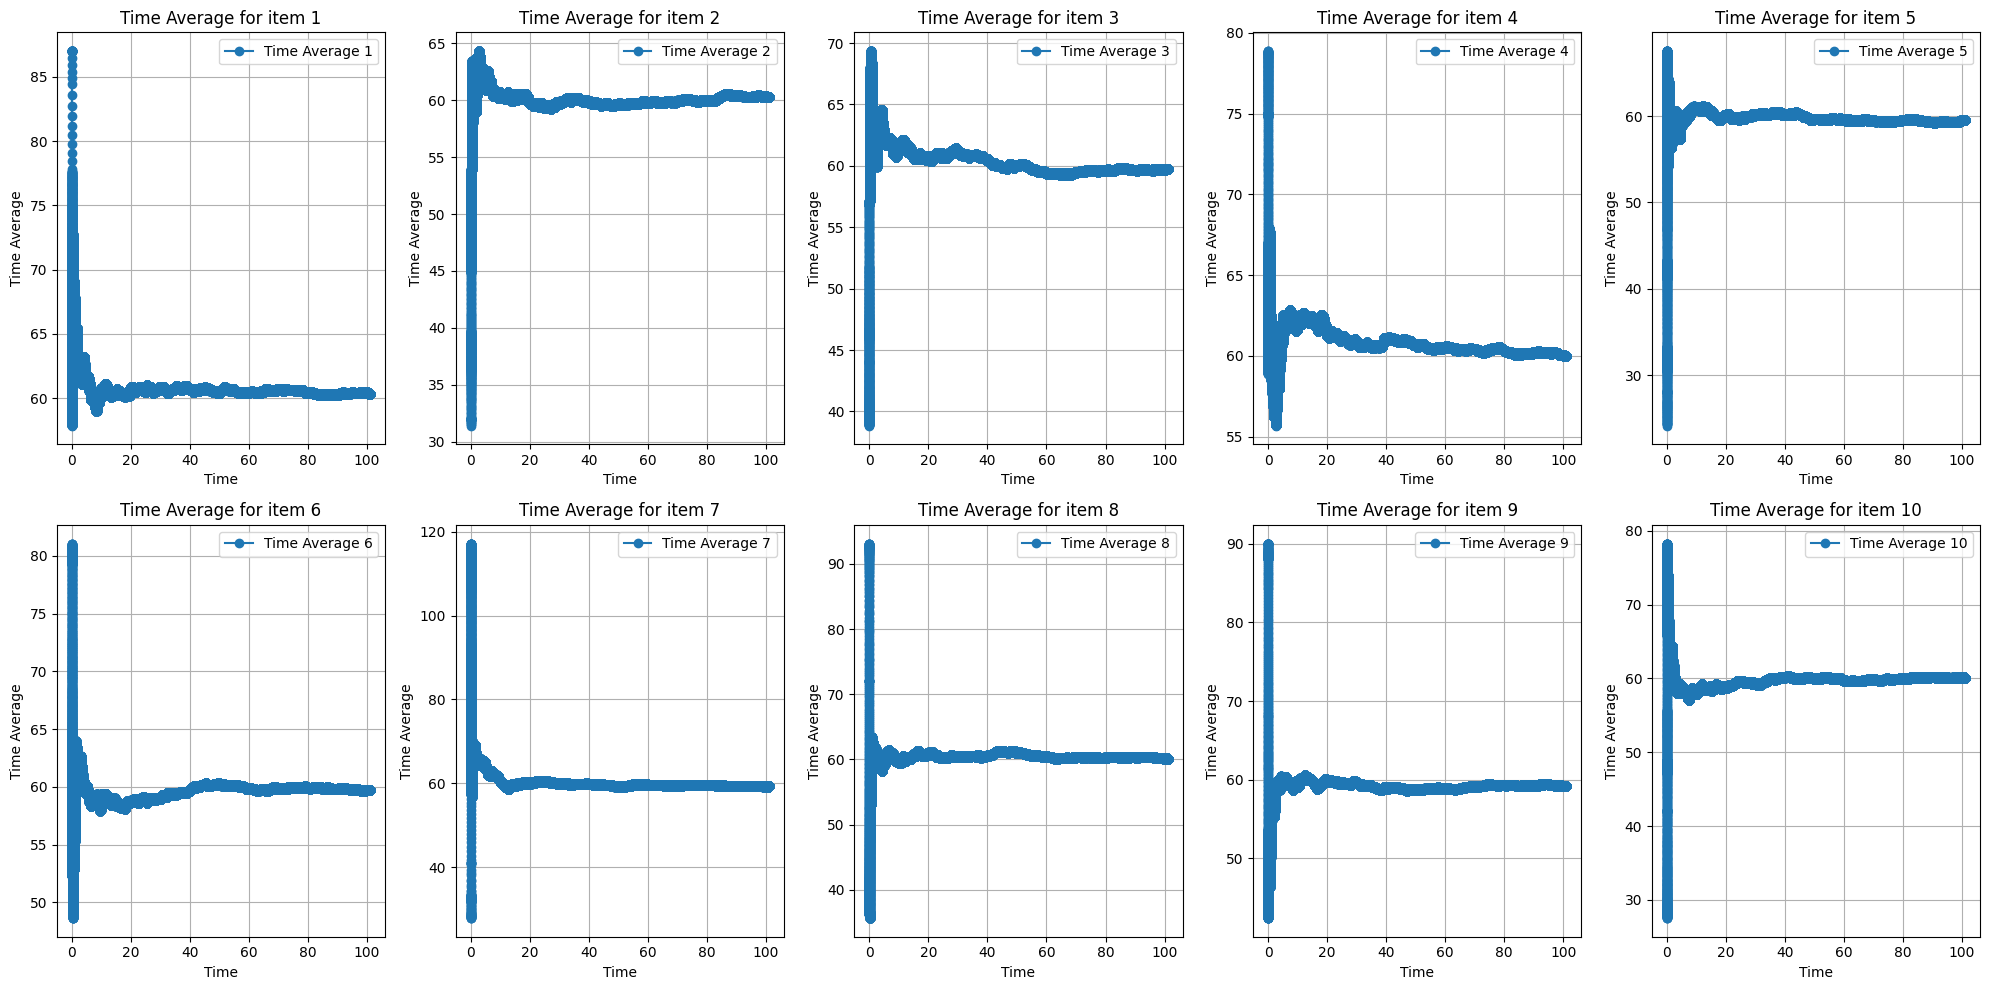

In [ ]:
import matplotlib.pyplot as plt
extracted_items = [sublist[2] for sublist in list2k]
numbers = list(range(1, 1000001))
result1 = [num / 9900 for num in numbers]



# Prepare the figure and axes for a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Iterate over each item from 1 to 10 in the sublist
for idx in range(1, 11):
    extracted_items = [sublist[idx+50] for sublist in list2k]
    cumulative_sum = np.cumsum(extracted_items)
    time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]

    # Define which subplot to plot on
    ax = axes[(idx-1)//5, (idx-1)%5]
    ax.plot(result1, time_average, '-o', label=f'Time Average {idx}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Time Average')
    ax.set_title(f'Time Average for item {idx}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
extracted_item6 = [sublist[1] for sublist in list2k]
def record_changes(lst):
    if not lst:
        return []

    # Initialize a list with the first item from lst
    changes = [lst[0]]

    # Iterate over the rest of the list
    for item in lst[1:]:
        # If the current item is different from the last recorded change
        if item != changes[-1]:
            changes.append(item)

    return changes


changes = record_changes(extracted_item6)
print(changes)  # This will print [1, 6, 8]


[50, 41, 50, 70, 69, 70, 26, 39, 57, 27, 57, 99, 96, 50, 54, 128, 101, 58, 28, 30, 50, 43, 12, 9, 24, 61, 58, 67, 85, 98, 133, 142, 84, 31, 18, 48, 59, 13, 43, 72, 82, 92, 149, 136, 75, 55, 37, 33, 100, 49, 27, 53, 40, 25, 29, 38, 27, 55, 41, 30, 48, 65, 55, 40, 58, 6, 39, 26, 19, 60, 85, 119, 19, 52, 31, 36, 98, 125, 121, 201, 145, 10, 35, 46, 26, 37, 53, 66, 19, 20, 25, 19, 6, 20, 32, 65, 33, 21, 20, 22, 9, 51, 44, 36, 40, 64, 51, 61, 53, 65, 47, 40, 27, 33, 44, 83, 93, 78, 51, 44, 40, 52, 68, 36, 23, 37, 49, 15, 13, 10, 16, 37, 39, 45, 47, 42, 65, 74, 51, 23, 43, 80, 30, 43, 35, 32, 27, 15, 21, 24, 50, 15, 34, 19, 43, 53, 39, 51, 71, 66, 24, 31, 150, 80, 54, 46, 75, 67, 115, 92, 48, 49, 62, 10, 24, 10, 18, 48, 50, 45, 53, 70, 73]


In [ ]:
import numpy as np

# Parameters for the gamma distribution
alpha = 2
theta = 40
n_samples = 100000

# Sample from the gamma distribution
samples = np.random.gamma(alpha, theta, n_samples)

# Compute the sample mean
sample_mean = np.mean(samples)

print(sample_mean)  # This should approximate 80


80.00367162521071


In [ ]:
import numpy as np

# Parameters for the gamma distribution
alpha = 3
theta = 20
n_samples = 1000  # Number of samples in each set
n_sets = 1000  # Number of sets of samples

sample_variances = []

for _ in range(n_sets):
    samples = np.random.gamma(alpha, theta, n_samples)
    sample_variances.append(samples)

# Compute variance of the sample variances
variance_of_sample_variances = np.var(sample_variances)

print(variance_of_sample_variances)


1202.5249754954236


## by once

In [ ]:
import numpy as np
from scipy.stats import gamma

# Your sample list (replace this with your actual list)
kl=full_trade(agent_a,mk)
# Sort kl and compute the ECDF
sorted_kl = np.sort(kl)
n = len(kl)
ecdf = np.arange(1, n + 1) / n





# Parameters for the gamma distributions
k1, theta1 = 2, 20
k2, theta2 = 3, 20

# Get the CDFs for each distribution
gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)

# Average the two CDFs for the mixture distribution
mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

# Calculate the K-S distance
ks_distance = np.max(np.abs(ecdf - mixture_cdf))

print("K-S distance:", ks_distance)


K-S distance: 0.05206144506559063


In [ ]:
k1, theta1 = 2, 20
k2, theta2 = 3, 20
gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)
mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

In [ ]:
import numpy as np
from scipy.stats import gamma
def compute_ks_distance(kl):
    # Sort kl and compute the ECDF
    sorted_kl = np.sort(kl)
    n = len(kl)
    ecdf = np.arange(1, n + 1) / n


    # Parameters for the gamma distribution
    k1, theta1 = 2, 20
    k2, theta2 = 3, 20
    gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2


    # Calculate the K-S distance
    ks_distance = np.max(np.abs(ecdf - mixture_cdf))

    return ks_distance

In [ ]:



def average_ks_distance(num_trials=10):
    ks_distances = []
    for _ in range(num_trials):
        kl = full_trade(agent_a, mk)  # Assuming full_trade generates a new sample each time it's called
        ks_distances.append(compute_ks_distance(kl))

    return np.mean(ks_distances)

avg_distance = average_ks_distance()
print("Average K-S distance over 10 trials:", avg_distance)


Average K-S distance over 10 trials: 0.060594622068919676


## get Km

## KR distance

In [ ]:
def compute_kr_distance(kl):
    # Sort kl and compute the ECDF
    sorted_kl = np.sort(kl)
    n = len(kl)
    ecdf = np.arange(1, n + 1) / n
    k1, theta1 = 2, 20
    k2, theta2 = 3, 20
    gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

    # Calculate the K-S distance
    kr_distance = np.sum(np.abs(ecdf - mixture_cdf)) / n

    return kr_distance

In [ ]:


def average_kr_distance(num_trials=10):
    kr_distances = []
    for _ in range(num_trials):
        kl = full_trade(agent_a, mk)  # Assuming full_trade generates a new sample each time it's called
        kr_distances.append(compute_kr_distance(kl))

    return np.mean(kr_distances)

avg_distance = average_kr_distance()
print("Average KR distance over 10 trials:", avg_distance)


Average KR distance over 10 trials: 0.024619661164292886


In [ ]:
kr_list=[]
for i in range(10000):
  kl=list2k[i]
  kr=compute_kr_distance(kl)

  kr_list.append(kr)
# Create a list of numbers from 1 to 10,000

numbers = list(range(1, 10001))

# Divide each number by 9,900
result = [num / 9900 for num in numbers]



In [ ]:
kr_sublist = kr_list[:300]



log_kr_list = [math.log(item) for item in kr_sublist]



result_sublist = result[:300]


In [ ]:
list2k[0]

In [ ]:
ks_list=[]
for i in range(10000):
  kl=list2k[i]
  ks=compute_ks_distance(kl)
  ks_list.append(ks)
# Create a list of numbers from 1 to 10,000
numbers = list(range(1, 10001))

# Divide each number by 9,981
# result = [num / 9900 for num in numbers]
result = [num / 9900 for num in numbers]

0.5644446944665122

In [ ]:
ks_sublist = ks_list[:300]
log_ks_list = [math.log(item) for item in ks_sublist]
result_sublist = result[:300]

## by time2

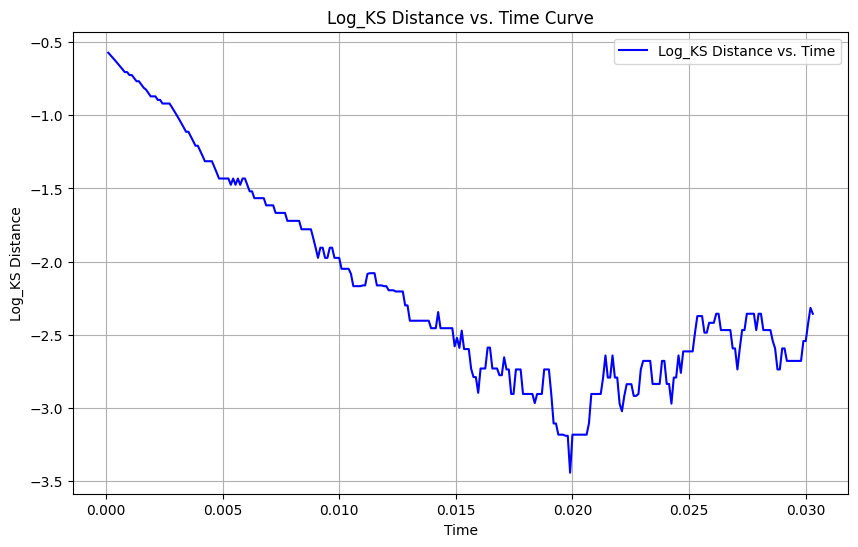

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your lists defined
# ks_list = [...]
# result = [...]

plt.figure(figsize=(10,6))
plt.plot(result_sublist, log_ks_list, label='Log_KS Distance vs. Time', color='blue')
plt.xlabel('Time')
plt.ylabel('Log_KS Distance')
plt.title('Log_KS Distance vs. Time Curve')
plt.legend()
plt.grid(True)
plt.show()


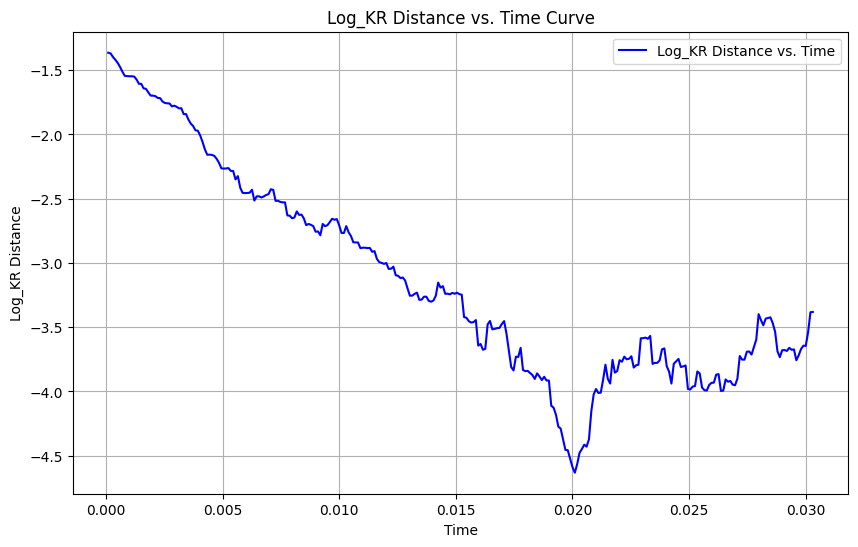

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your lists defined
# ks_list = [...]
# result = [...]

plt.figure(figsize=(10,6))
plt.plot(result_sublist, log_kr_list, label='Log_KR Distance vs. Time', color='blue')
plt.xlabel('Time')
plt.ylabel('Log_KR Distance')
plt.title('Log_KR Distance vs. Time Curve')
plt.legend()

plt.grid(True)
plt.show()

## Slope


In [ ]:
import numpy as np
from scipy.stats import linregress

# Example data

slope, intercept, r_value, p_value, std_err = linregress(result_sublist,log_kr_list)

print("Slope of the regression:", slope)


Slope of the regression: -81.26588665984201


#???


In [ ]:
kl

In [ ]:
km = []

for i in range(1000):
    current_list = full_trade(agent_a,mk)
    km.extend(current_list)  # Extend appends items from the current list to the master list.
    i+=1
    print(i)

In [ ]:
agent_a['money']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# ks_sublist = [...]
# result_sublist = [...]

# 1. Smoothing: Moving average filter
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 5
smoothed_ks = moving_average(ks_sublist, window_size)

# Adjust the result_sublist to match the length of smoothed_ks
adjusted_results = result_sublist[window_size-1:]

# 2. Calculate convergence rate
log_time = adjusted_results

# Fit a linear regression to the smoothed data
slope, intercept = np.polyfit(log_time, smoothed_ks, 1)
convergence_rate = slope

print("Estimated convergence rate:", convergence_rate)




Estimated convergence rate: -11.08207240536632


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# ks_sublist = [...]
# result_sublist = [...]

# 1. Smoothing: Moving average filter
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 5
smoothed_ks = moving_average(kr_sublist, window_size)

# Adjust the result_sublist to match the length of smoothed_ks
adjusted_results = result_sublist[window_size-1:]

# 2. Calculate convergence rate
log_time = adjusted_results

# Fit a linear regression to the smoothed data
slope, intercept = np.polyfit(log_time, smoothed_ks, 1)
convergence_rate = slope

print("Estimated convergence rate:", convergence_rate)




Estimated convergence rate: -5.288316825368248


## Log slope

## cdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Assuming your km list is defined as:
# km = [...]

# Create the ECDF for the km list
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(km)

# Parameters for the gamma distribution
k = 3
theta = 50/3

# Define the range of x values
x_values = np.linspace(min(km), max(km), 1000)
gamma_cdf_values = gamma.cdf(x_values, k, scale=theta)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label='ECDF of km', color='blue', linestyle='-')
plt.plot(x_values, gamma_cdf_values, label='Gamma(3, 50/3) CDF', color='red', linestyle='--')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('ECDF of km vs. Gamma(3, 50/3) CDF')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


NameError: ignored

In [ ]:
import numpy as np

def compute_ecdf(data):
    """Compute the ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Assuming your kl list is defined:
# kl = [...]

x, y = compute_ecdf(kl)

# x and y now represent the values and their corresponding ECDF values.
print(len(x),len(y))

10000 10000


In [ ]:
len(kl)

100

In [ ]:
id_list = [i for i in range(100)]
alpha = [2]*50 + [3]*50

eta = [2]*50 + [3]*50
#goods = [random.randint(10, 90) for _ in range(100)]
#money = [random.randint(100, 900) for _ in range(100)]
goods = [50 for _ in range(100)]
money = [100 for _ in range(100)]

In [ ]:
agent_a['eta']=[2 for _ in range(100)]

In [ ]:
kl=km

In [ ]:
kl=full_trade(agent_a,mk)
kl

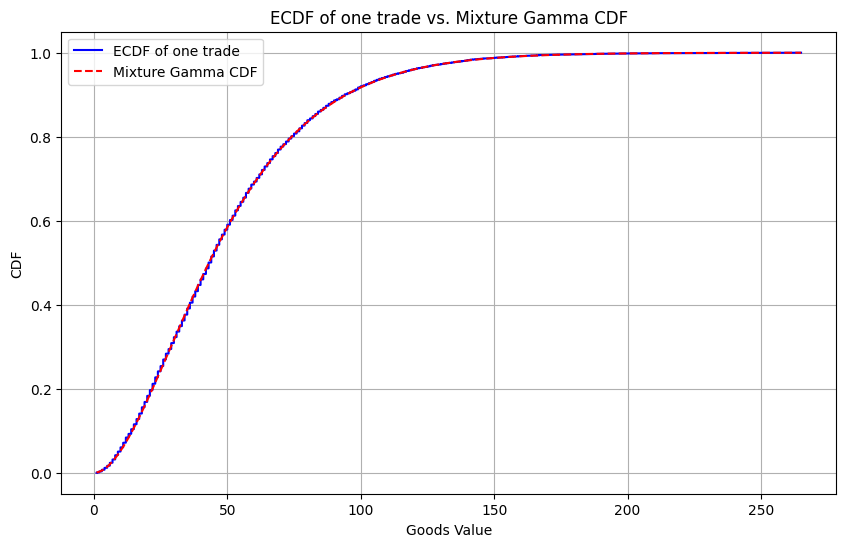

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



x, y = compute_ecdf(kl)

# Parameters for the gamma distribution


# Define the range of x values
x_values = np.linspace(min(kl), max(kl), 1000)
gamma_cdf_values1 = gamma.cdf(x_values, 2, scale=20)
gamma_cdf_values2 = gamma.cdf(x_values, 3, scale=20)
gamma_cdf_values = 0.5 * gamma_cdf_values1 + 0.5 * gamma_cdf_values2
# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label='ECDF of one trade', color='blue', linestyle='-')
plt.plot(x_values, gamma_cdf_values, label='Mixture Gamma CDF', color='red', linestyle='--')
plt.xlabel('Goods Value')
plt.ylabel('CDF')
plt.title('ECDF of one trade vs. Mixture Gamma CDF')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


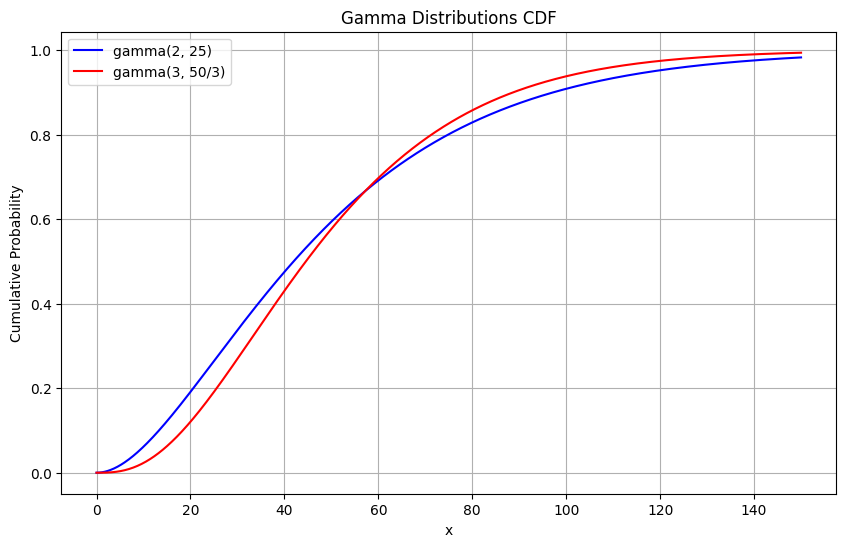

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters
k1, theta1 = 2, 20
k2, theta2 = 3, 20

# Generate x values
x = np.linspace(0, 150, 1000)

# Calculate CDF values
cdf1 = gamma.cdf(x, k1, scale=theta1)
cdf2 = gamma.cdf(x, k2, scale=theta2)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, cdf1, label='gamma(2, 25)', color='blue')
plt.plot(x, cdf2, label='gamma(3, 50/3)', color='red')
plt.title('Gamma Distributions CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


## others


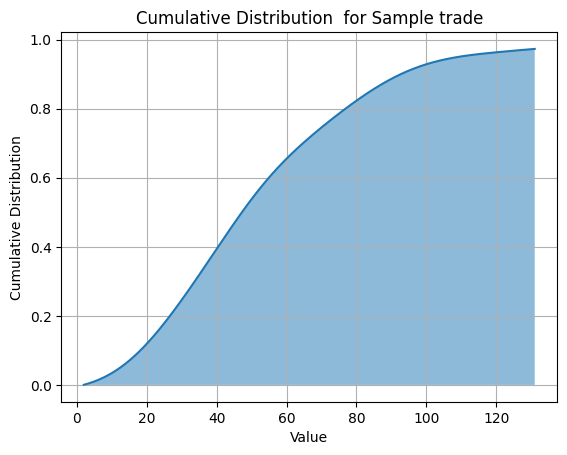

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data


# Create a Gaussian Kernel Density Estimate of the data
density = gaussian_kde(kl)

# Generate x values
x = np.linspace(min(kl) - 1, max(kl) + 1, 1000)  # Adjust the range and points as needed

# Compute the cumulative density
cumulative_density = np.cumsum(density(x)) * (x[1] - x[0])

# Plot the cumulative density
plt.plot(x, cumulative_density, label='Cumulative Density')
plt.fill_between(x, cumulative_density, alpha=0.5)
plt.title('Cumulative Distribution  for Sample trade')
plt.xlabel('Value')
plt.ylabel('Cumulative Distribution')
plt.grid(True)
plt.show()





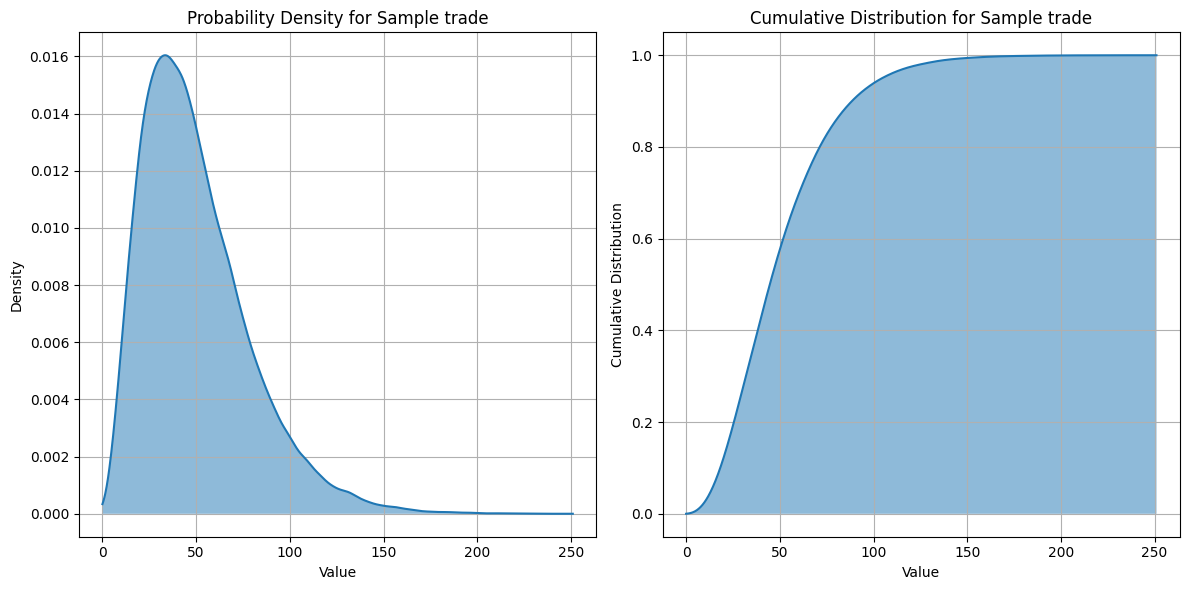

In [ ]:
kl=km
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data


# Create a Gaussian Kernel Density Estimate of the data
density = gaussian_kde(kl)

# Generate x values
x = np.linspace(min(kl) - 1, max(kl) + 1, 1000)  # Adjust the range and points as needed

# Compute the density values
density_values = density(x)

# Compute the cumulative density
cumulative_density = np.cumsum(density_values) * (x[1] - x[0])

# Plot the probability density
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, density_values, label='Probability Density')
plt.fill_between(x, density_values, alpha=0.5)
plt.title('Probability Density for Sample trade')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Plot the cumulative density
plt.subplot(1, 2, 2)
plt.plot(x, cumulative_density, label='Cumulative Density')
plt.fill_between(x, cumulative_density, alpha=0.5)
plt.title('Cumulative Distribution for Sample trade')
plt.xlabel('Value')
plt.ylabel('Cumulative Distribution')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


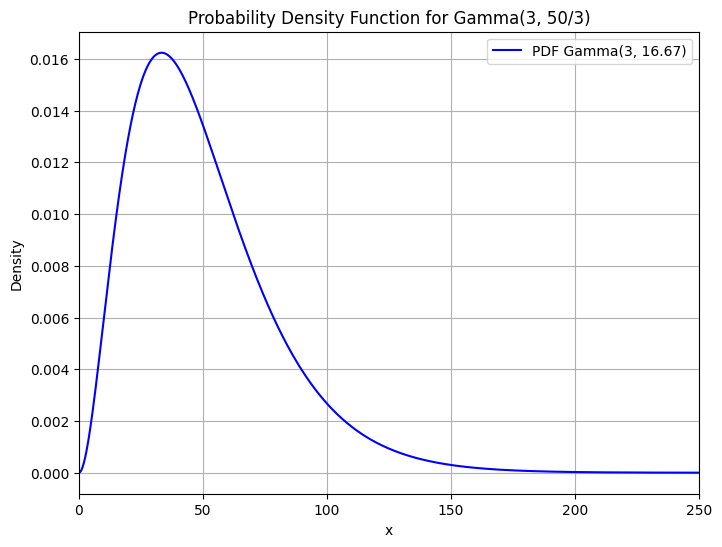

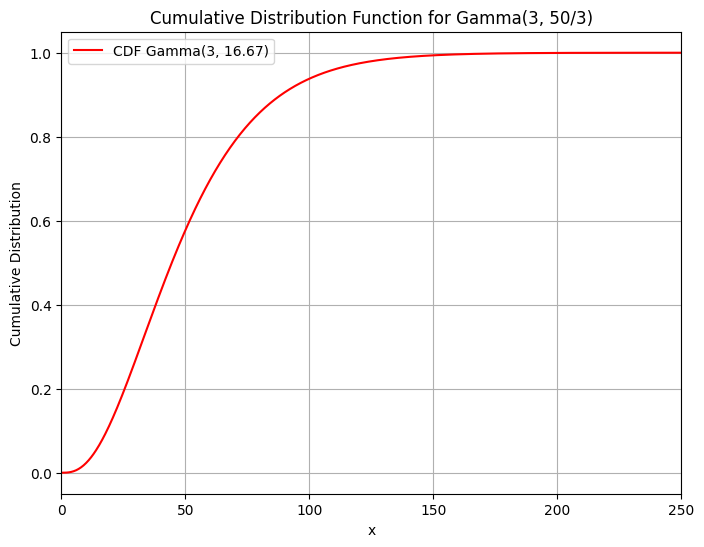

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

alpha = 3  # shape parameter
beta = 50/3  # scale parameter

# Generate x values
x = np.linspace(0, 250, 1000)  # Adjust the range up to 250

# Compute gamma pdf and cdf values
y_pdf = gamma.pdf(x, alpha, scale=beta)
y_cdf = gamma.cdf(x, alpha, scale=beta)

# Plot PDF in a separate figure
plt.figure(figsize=(8, 6))
plt.plot(x, y_pdf, 'b-', label=f'PDF Gamma({alpha}, {beta:.2f})')
plt.title('Probability Density Function for Gamma(3, 50/3)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.xlim(0, 250)
plt.show()

# Plot CDF in a separate figure
plt.figure(figsize=(8, 6))
plt.plot(x, y_cdf, 'r-', label=f'CDF Gamma({alpha}, {beta:.2f})')
plt.title('Cumulative Distribution Function for Gamma(3, 50/3)')
plt.xlabel('x')
plt.ylabel('Cumulative Distribution')
plt.grid(True)
plt.legend()
plt.xlim(0, 250)
plt.show()


